In [1]:
%matplotlib notebook

from aws_utils import scan
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
data = scan()

In [3]:
data['ResponseMetadata']

{'RequestId': '4I27T114R1A9JEVHPEL9MVMJDJVV4KQNSO5AEMVJF66Q9ASUAAJG',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'server': 'Server',
  'date': 'Thu, 29 Nov 2018 15:27:17 GMT',
  'content-type': 'application/x-amz-json-1.0',
  'content-length': '161947',
  'connection': 'keep-alive',
  'x-amzn-requestid': '4I27T114R1A9JEVHPEL9MVMJDJVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'x-amz-crc32': '462840255'},
 'RetryAttempts': 0}

In [4]:
df = pd.DataFrame(data['Items']).sort_values(by=['timestamp']).reset_index(drop=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['temperature'] = df['temperature'].astype(float)

In [5]:
df['temperature_smoothed'] = df['temperature'].rolling(60,center=True).mean()

In [6]:
df.tail()

,temperature,timestamp,temperature_smoothed
1907,58.002283,2018-11-29 07:23:06.947726,NaN
1908,54.174928,2018-11-29 07:24:07.249898,NaN
1909,57.434387,2018-11-29 07:25:06.676630,NaN
1910,55.757381,2018-11-29 07:26:07.089636,NaN
1911,58.053330,2018-11-29 07:27:06.901618,NaN


<IPython.core.display.Javascript object>


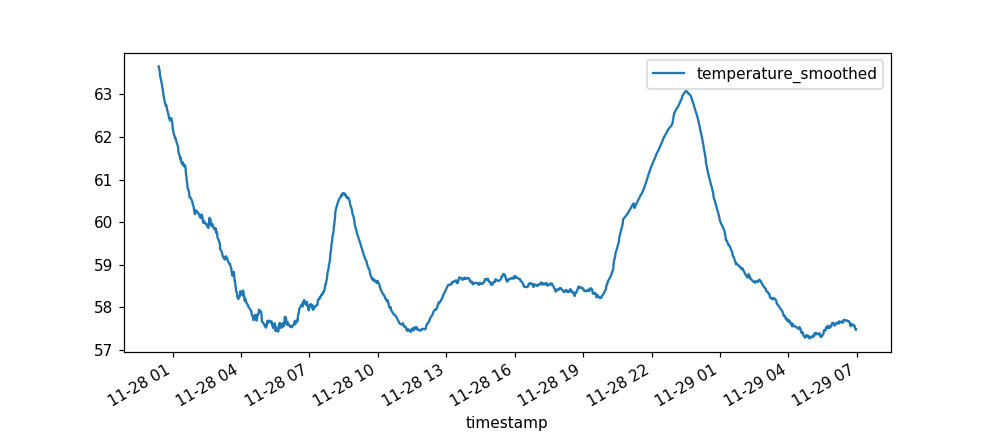

In [7]:
fig,ax=plt.subplots(figsize=(9,4))
# df.plot(x='timestamp',y='temperature',ax=ax)
df.plot(x='timestamp',y='temperature_smoothed',ax=ax)